<h1>Extracting Stock Data Using a Python Library</h1>


<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. </p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info (Workaround provided as current yf .info method does not work)</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
    </ul>
Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


<hr>


In [1]:
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3

     -------------------------------------- 147.9/147.9 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 5.5 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.4
    Uninstalling lxml-4.6.4:
      Successfully uninstalled lxml-4.6.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda\\Lib\\site-packages\\~xml\\etree.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import yfinance as yf
import pandas as pd

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")

### Stock Info
Using yf <code>info</code> method should have been able to provide information about the stock as a Python dictionary.

Using the workaround, as current yf .info method does not work.

This code snippet below effectively downloads the content of the specified URL and saves it to a local file named "apple.json."


In [4]:
# Use the requests library to send an HTTP GET request to the specified URL (url).
# Store response in the response variable.

import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
response = requests.get(url)

# Open a local file named "apple.json" in binary write mode ("wb") and write the binary content of the HTTP response (response.content) to the local file.

with open("apple.json", "wb") as file:
    file.write(response.content)

In [5]:
# Use the json module to open the local file "apple.json" and load its content as a Python object (apple_info).
# The content of "apple.json" is assumed to be in JSON format.

import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country


In [6]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [7]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [9]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<AxesSubplot:xlabel='Date'>

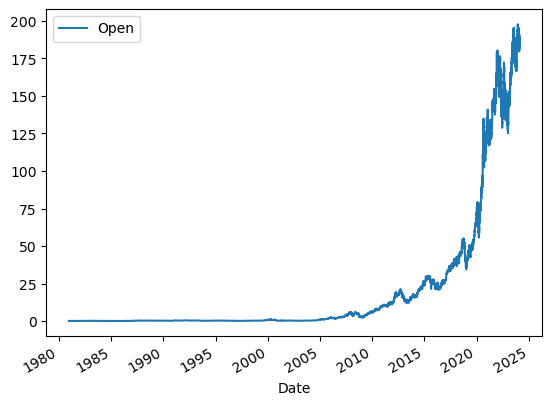

In [10]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [11]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
Name: Dividends, Length: 82, dtype: float64

We can plot the dividends overtime:


<AxesSubplot:xlabel='Date'>

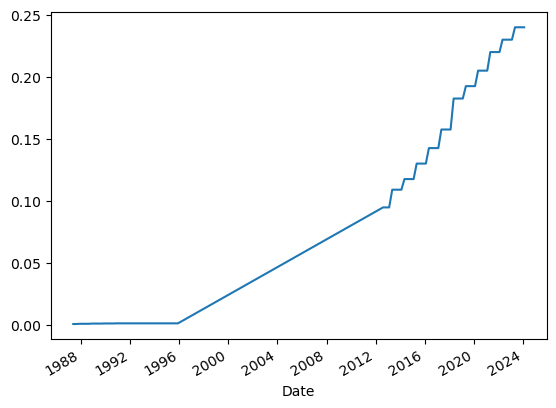

In [12]:
apple.dividends.plot()

## Another example 


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.

Similar method as above code for Apple is used for AMD below.

In [13]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json"
response = requests.get(url)

with open("amd.json", "wb") as file:
    file.write(response.content)


In [14]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

Obtain stock data for AMD using the `history` function and finding the `Volume` traded on the first day (first row).


In [16]:
amd = yf.Ticker("AMD")
amd_share_price = amd.history(period='max')
amd_share_price.head(1)['Volume']

Date
1980-03-17 00:00:00-05:00    219600
Name: Volume, dtype: int64